<a href="https://colab.research.google.com/github/arkapriyathecoderinprogress/TextEmotionDetection/blob/main/EmotionDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Function to load the data
def load_emotion_data(path):
    texts, labels = [], []
    with open(path, 'r', encoding='utf-8') as f:
        for line in f:
            if ';' in line:
                text, label = line.strip().rsplit(';', 1)
                texts.append(text)
                labels.append(label)
    return pd.DataFrame({'text': texts, 'label': labels})

# Load datasets
train_df = load_emotion_data('/content/train.txt')
val_df = load_emotion_data('/content/val.txt')
test_df = load_emotion_data('/content/test.txt')

# Dataset size check
print("Train:", train_df.shape)
print("Val:", val_df.shape)
print("Test:", test_df.shape)
print("\nSample data:\n", train_df.head())

Train: (16000, 2)
Val: (2000, 2)
Test: (2000, 2)

Sample data:
                                                 text    label
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


In [5]:
# Check for missing values
print(train_df.isnull().sum())
print(val_df.isnull().sum())
print(test_df.isnull().sum())

text     0
label    0
dtype: int64
text     0
label    0
dtype: int64
text     0
label    0
dtype: int64


In [6]:
# Class distribution
train_df['label'].value_counts()

,count
label,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


/tmp/ipython-input-9-1155702452.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='Set2')


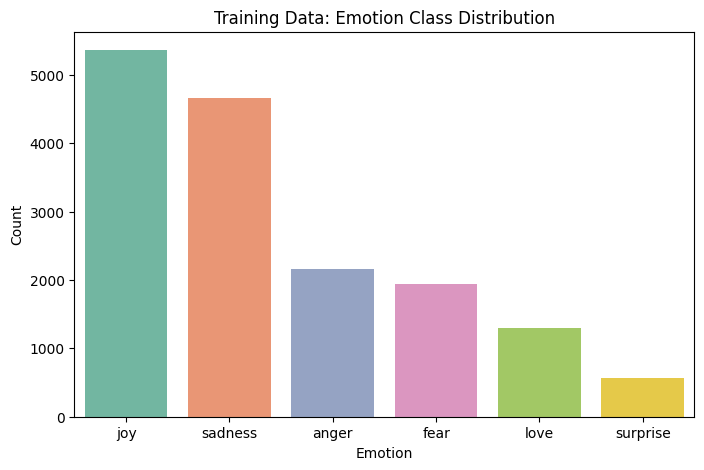

In [9]:
# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x='label', order=train_df['label'].value_counts().index, palette='Set2')
plt.title('Training Data: Emotion Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [10]:
# Average sentence length
train_df['text_len'] = train_df['text'].apply(lambda x: len(x.split()))
print(train_df['text_len'].describe())

count    16000.000000
mean        19.166313
std         10.986905
min          2.000000
25%         11.000000
50%         17.000000
75%         25.000000
max         66.000000
Name: text_len, dtype: float64


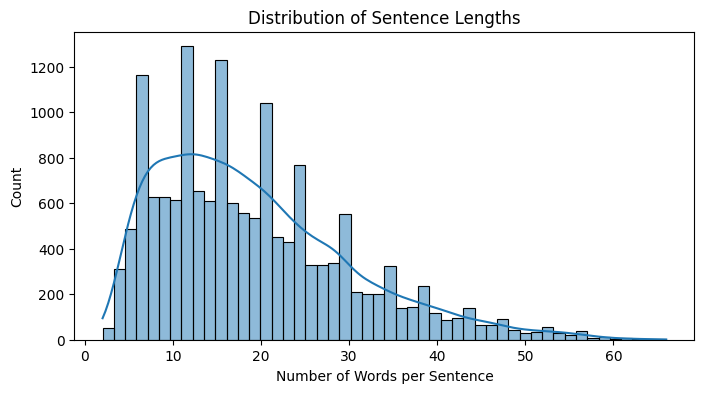

In [11]:
# Visualize the ASL
plt.figure(figsize=(8, 4))
sns.histplot(train_df['text_len'], bins=50, kde=True)
plt.title("Distribution of Sentence Lengths")
plt.xlabel("Number of Words per Sentence")
plt.show()

In [12]:
# Longest & Shortest sentence
max_len = train_df.loc[train_df['text_len'].idxmax()]
min_len = train_df.loc[train_df['text_len'].idxmin()]

print("Longest sentence:\n", max_len['text'], "\nWords:", max_len['text_len'])
print("\nShortest sentence:\n", min_len['text'], "\nWords:", min_len['text_len'])

Longest sentence:
 i guess which meant or so i assume no photos no words or no other way to convey what it really feels unless you feels it yourself or khi bi t au th m i bi t th ng ng i b au i rephrase it to a bit more gloomy context unless you are hurt yourself you will never have sympathy for the hurt ones 
Words: 66

Shortest sentence:
 earth crake 
Words: 2


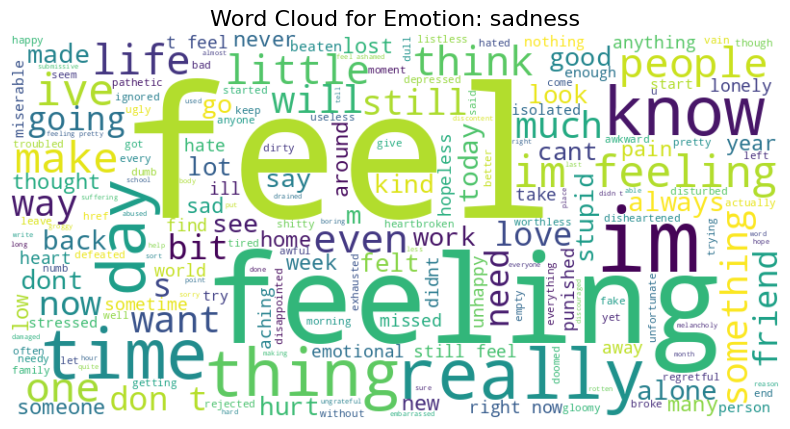

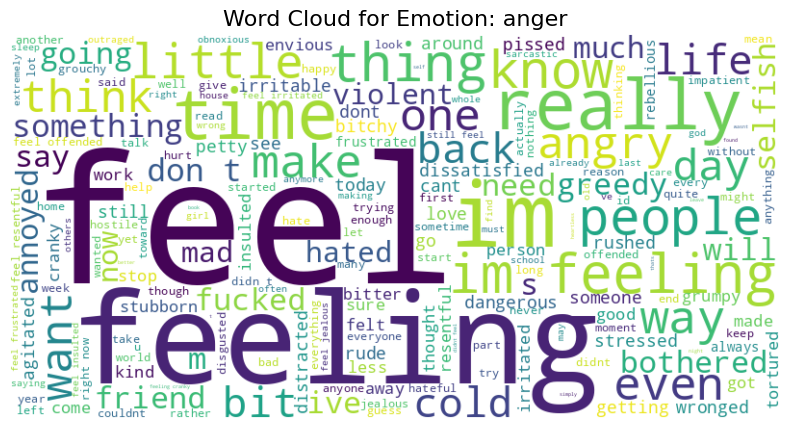

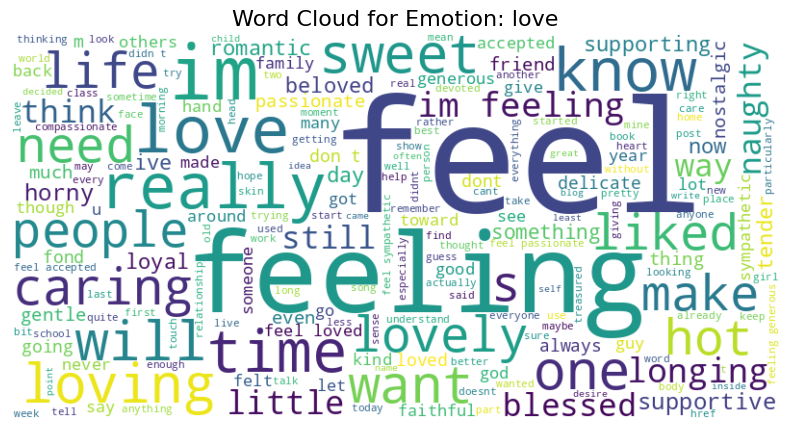

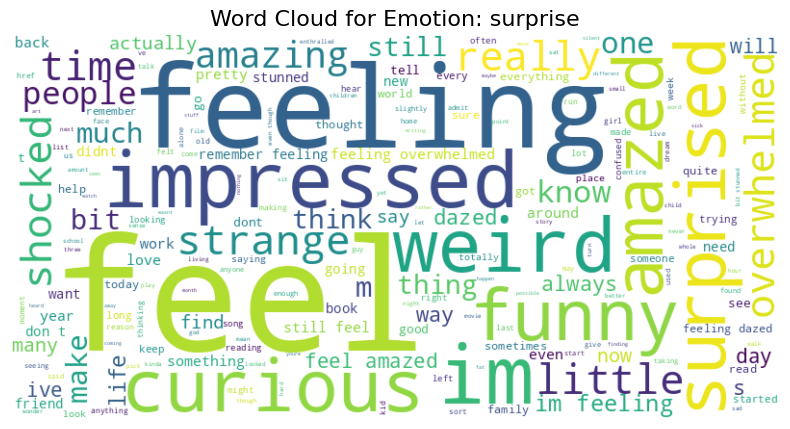

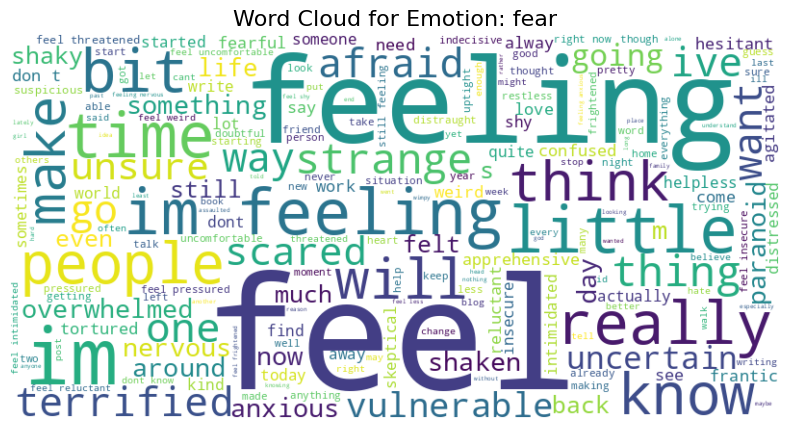

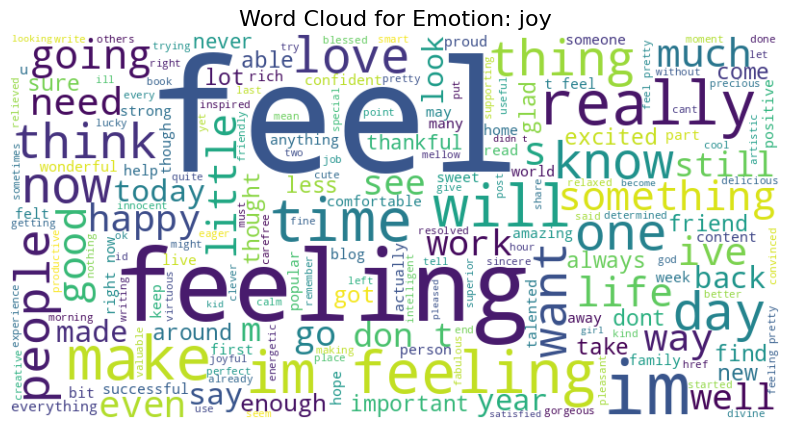

In [13]:
# Word cloud for each emotion
from wordcloud import WordCloud

emotions = train_df['label'].unique()

for emotion in emotions:
    text = " ".join(train_df[train_df['label'] == emotion]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Emotion: {emotion}", fontsize=16)
    plt.show()

/tmp/ipython-input-14-3760831050.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_len', data=train_df, palette="Pastel1")


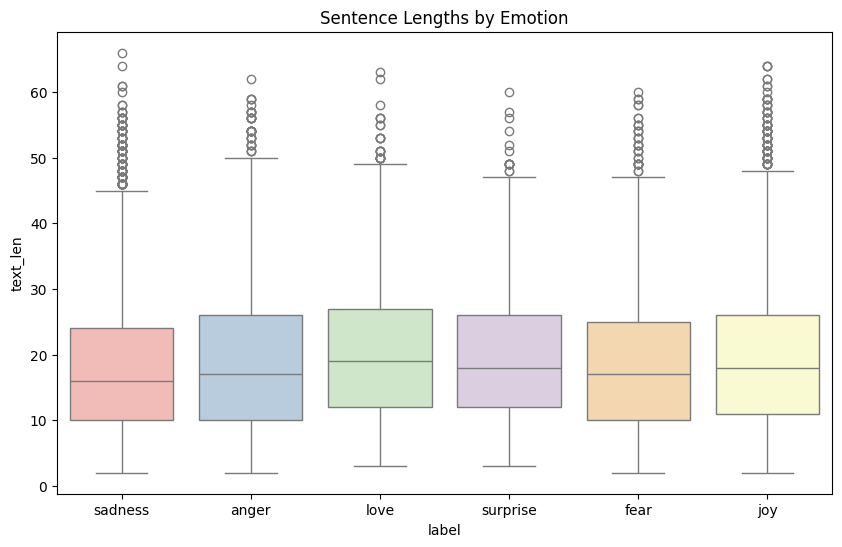

In [14]:
# Class-wise sentence length distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='text_len', data=train_df, palette="Pastel1")
plt.title('Sentence Lengths by Emotion')
plt.show()

In [15]:
# Text Preprocessing: clean the text
import re

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and digits
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text).strip()
    return text

# Apply cleaning to all datasets
train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)
test_df['clean_text'] = test_df['text'].apply(clean_text)

# Preview cleaned data
train_df[['text', 'clean_text']].head()

,text,clean_text
0,i didnt feel humiliated,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,i am feeling grouchy


In [16]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train_df['label_enc'] = label_encoder.fit_transform(train_df['label'])
val_df['label_enc'] = label_encoder.transform(val_df['label'])
test_df['label_enc'] = label_encoder.transform(test_df['label'])

# Save for inverse mapping later
emotion_labels = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(emotion_labels)

{'anger': np.int64(0), 'fear': np.int64(1), 'joy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4), 'surprise': np.int64(5)}


In [18]:
# Tokenization
from tensorflow.keras.preprocessing.text import Tokenizer

# Set vocab size (you can tweak later)
VOCAB_SIZE = 10000

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<OOV>")
tokenizer.fit_on_texts(train_df['clean_text'])

# Save tokenizer for later use
word_index = tokenizer.word_index
print(f"Size of vocabulary: {len(word_index)}")

Size of vocabulary: 15213


In [19]:
# Convert text to sequences
from keras.preprocessing.sequence import pad_sequences

# Convert to sequences
train_sequences = tokenizer.texts_to_sequences(train_df['clean_text'])
val_sequences = tokenizer.texts_to_sequences(val_df['clean_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['clean_text'])

# Pad sequences (based on your EDA, max_len ≈ 60)
MAX_LEN = 60

train_padded = pad_sequences(train_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
val_padded = pad_sequences(val_sequences, maxlen=MAX_LEN, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=MAX_LEN, padding='post', truncating='post')

In [20]:
# Prepare labels
import numpy as np

y_train = np.array(train_df['label_enc'])
y_val = np.array(val_df['label_enc'])
y_test = np.array(test_df['label_enc'])

# Number of classes
NUM_CLASSES = len(label_encoder.classes_)
print("Number of emotion classes:", NUM_CLASSES)

Number of emotion classes: 6


In [21]:
# Build the Bi-LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Hyperparameters
EMBEDDING_DIM = 128
LSTM_UNITS = 64
DROPOUT_RATE = 0.5

model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(LSTM_UNITS, return_sequences=False)),
    Dropout(DROPOUT_RATE),
    Dense(64, activation='relu'),
    Dropout(DROPOUT_RATE),
    Dense(NUM_CLASSES, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the model
# Early stopping to prevent overfitting
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_padded, y_train,
    validation_data=(val_padded, y_val),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop]
)

Epoch 1/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 43s 152ms/step - accuracy: 0.3383 - loss: 1.5904 - val_accuracy: 0.6655 - val_loss: 0.8957
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 158ms/step - accuracy: 0.7101 - loss: 0.7666 - val_accuracy: 0.7740 - val_loss: 0.5975
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 150ms/step - accuracy: 0.8366 - loss: 0.4382 - val_accuracy: 0.8520 - val_loss: 0.4555
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 144ms/step - accuracy: 0.9157 - loss: 0.2634 - val_accuracy: 0.8660 - val_loss: 0.4411
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.9388 - loss: 0.2003 - val_accuracy: 0.8915 - val_loss: 0.3965
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 148ms/step - accuracy: 0.9539 - loss: 0.1506 - val_accuracy: 0.8925 - val_loss: 0.4472
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 153ms/step - accuracy: 0.9658 - loss: 0.1126 - val_accuracy: 0.8900 - val_loss: 0.5024
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 146ms/step - accuracy: 0.9715 - loss: 0

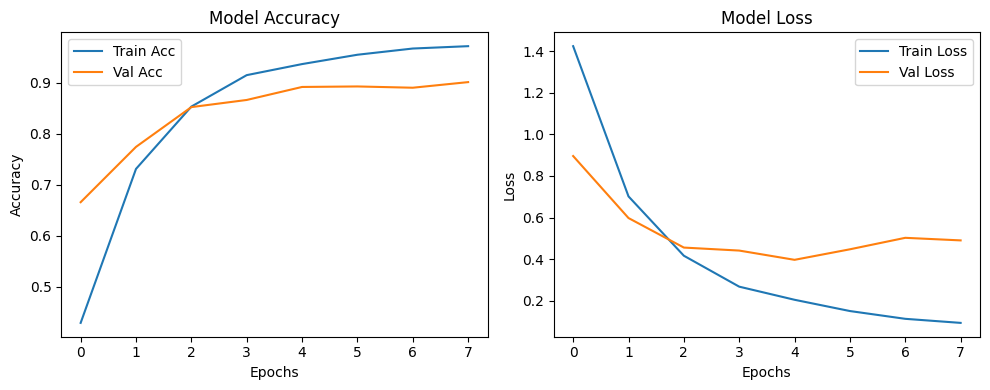

In [23]:
# Plot Accuracy and Loss Curves
import matplotlib.pyplot as plt

def plot_metrics(history):
    # Accuracy
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)

In [24]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_padded, y_test)
print(f"\n📊 Test Accuracy: {test_acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8864 - loss: 0.3682

📊 Test Accuracy: 0.8885


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step
              precision    recall  f1-score   support

       anger       0.93      0.81      0.87       275
        fear       0.81      0.89      0.85       224
         joy       0.92      0.93      0.92       695
        love       0.78      0.82      0.80       159
     sadness       0.96      0.93      0.95       581
    surprise       0.44      0.52      0.47        66

    accuracy                           0.89      2000
   macro avg       0.81      0.82      0.81      2000
weighted avg       0.89      0.89      0.89      2000



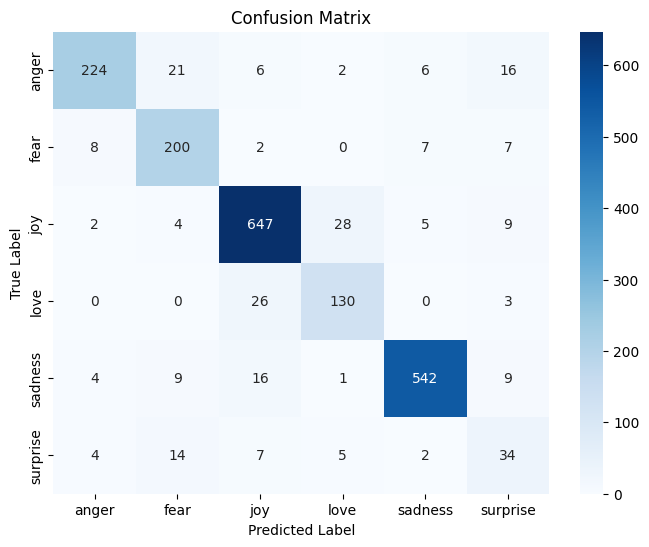

In [25]:
# Confusion Matrix and Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict classes
y_pred_probs = model.predict(test_padded)
y_pred = y_pred_probs.argmax(axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Prediction Function
def predict_emotion(text):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=MAX_LEN, padding='post', truncating='post')
    pred = model.predict(padded)
    label_index = np.argmax(pred)
    return label_encoder.inverse_transform([label_index])[0]

# Examples
print(predict_emotion("I'm feeling very disappointed and sad."))
print(predict_emotion("I'm so excited I could scream!"))
print(predict_emotion("I'm heartbroken and angry."))
print(predict_emotion("Nothing makes sense anymore."))
print(predict_emotion("That was totally unexpected!"))
print(predict_emotion("I feel warm and fuzzy inside."))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
joy
